# Paper Figures
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 1/28/2022|

In [1]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy.optimize import curve_fit

dpi = 300 # PDF resolution (dots per inch)
pwd = '../unstrat/'

## DDD

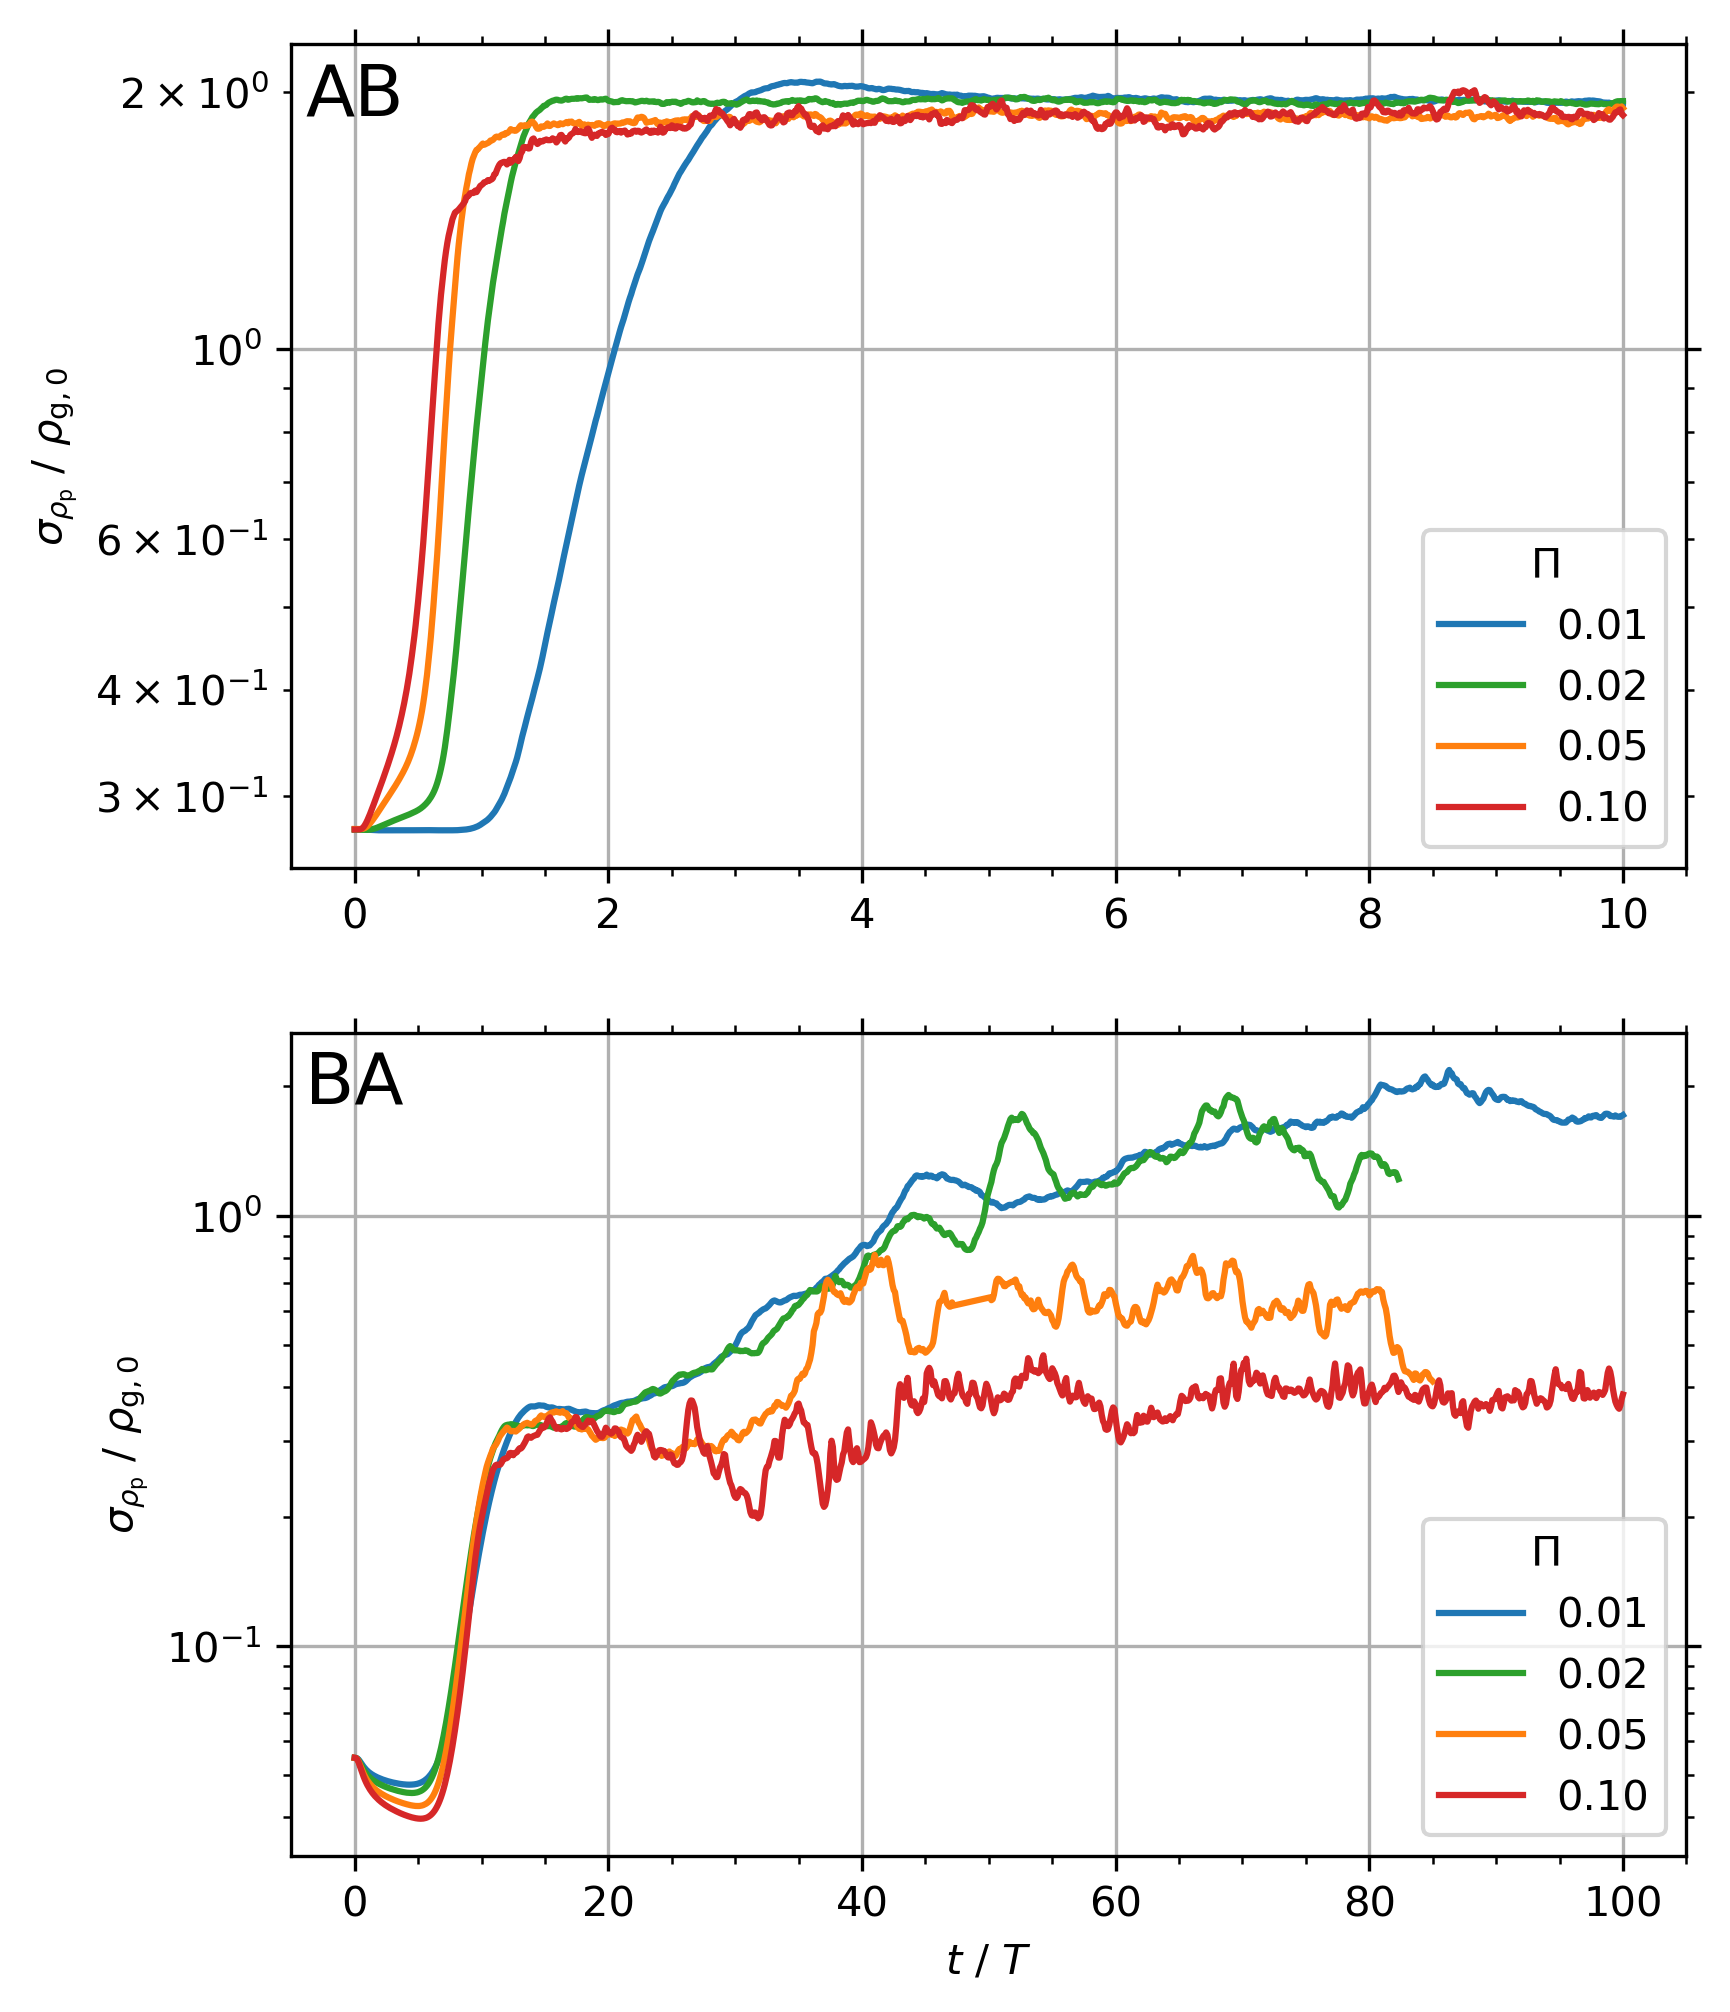

In [2]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), dpi=dpi)
runs = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
xlims = [(-0.5, 10.5), (-5, 105)]                           # remove for final

for i,run in enumerate(runs):
    for Pi in Pis:
        hst = athena_read.hst(pwd+'%s/%s/%s/output/SI.hst'\
                              %(run, Pi[0], res))
        rhop_amps = np.sqrt(hst['drhop2'] - hst['drhop']**2)

        axs[i].semilogy(hst['time'], rhop_amps, color=Pi[1], label=Pi[0])
    
    axs[i].grid()
    axs[i].legend(loc='lower right', title=r'$\Pi$')
    axs[i].minorticks_on()
    axs[i].set(xlim=xlims[i],                               # remove for final
               ylabel=r'$\sigma_{\rho_\mathrm{p}}$ / $\rho_\mathrm{g,0}$')
    axs[i].text(0.01, 0.98, run, ha='left', va='top', size='xx-large',
                transform=axs[i].transAxes)
    axs[i].tick_params(which='both', top=True, right=True)

axs[1].set(xlabel=r'$t$ / $T$')
plt.savefig('figs/ddd.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/ddd.png', bbox_inches='tight', pad_inches=0.01)

## CPDD

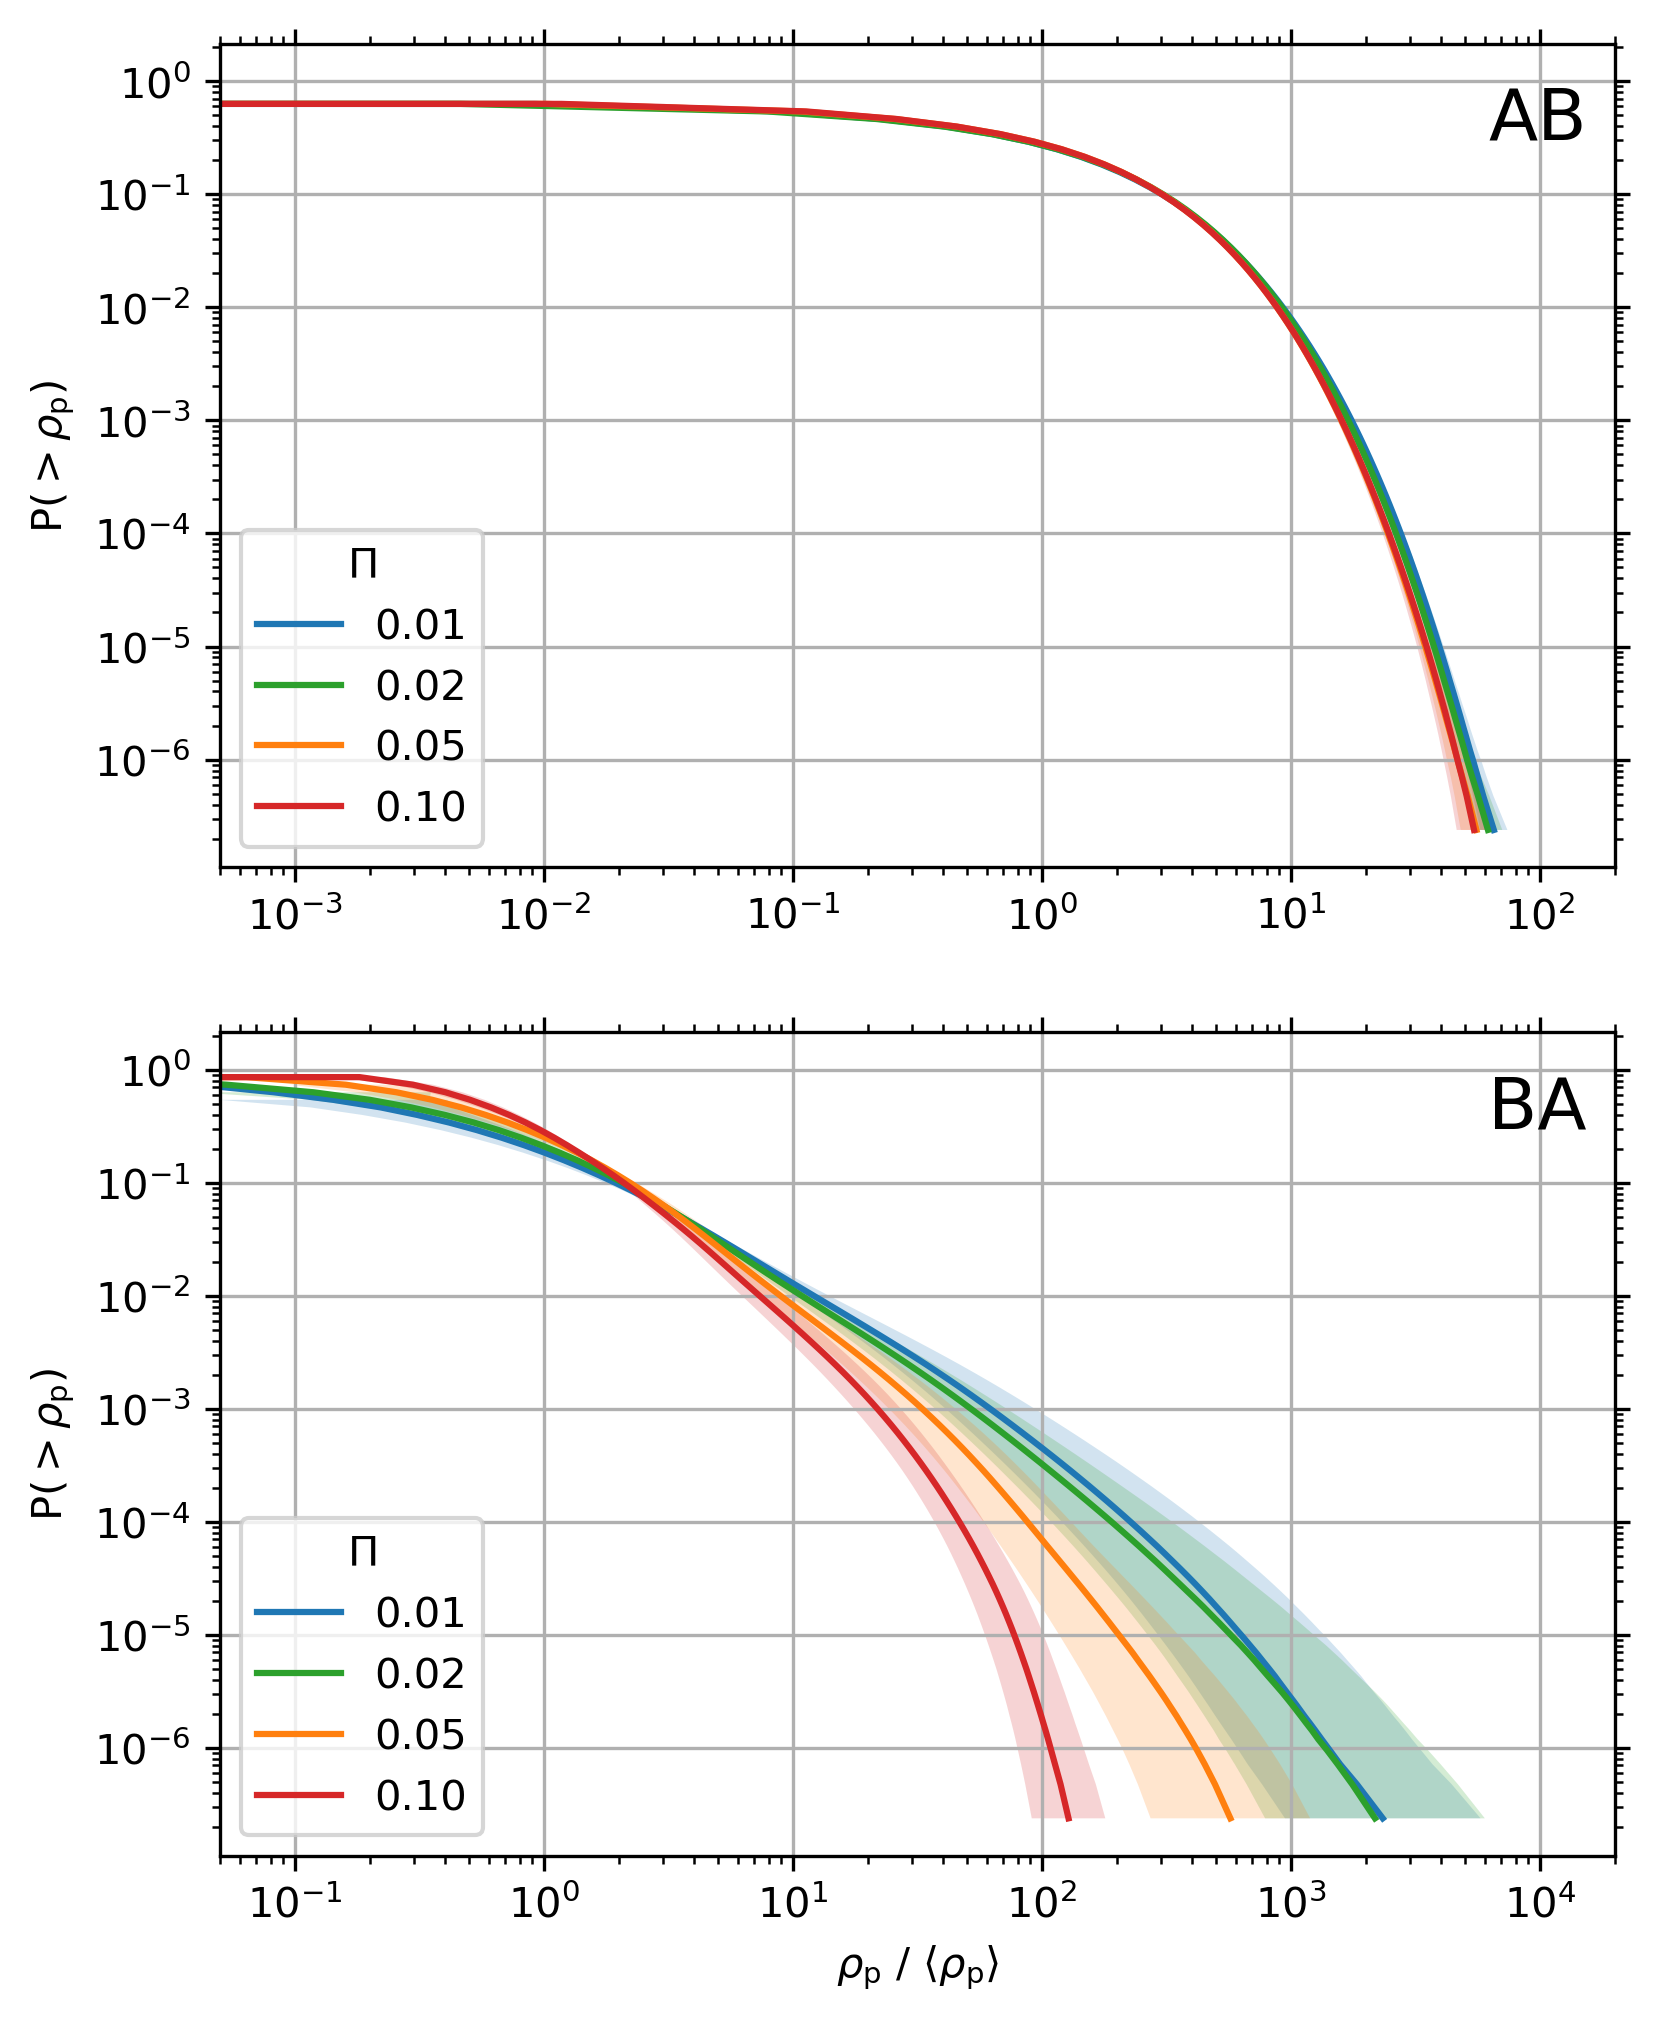

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), dpi=dpi)
runs = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
xlims = [(5e-4, 2e2), (5e-2, 2e4)]
indices = -np.unique(np.logspace(np.log2(int(res)**2), 0, num=100,
                     base=2, dtype=int))
arrays, max_rhops, std_max_rhops = [[], []], [], []

for i,ax in enumerate(axs.flat):
    for Pi in Pis:
        with np.load(pwd+'%s/%s/%s/output/cpdd.npz'\
                     %(runs[i], Pi[0], res)) as data:
            cdf = np.flip(np.take_along_axis(data['cdf'], indices, 0))
            avgs = np.flip(np.take_along_axis(data['avgs'], indices, 0))
            stds = np.flip(np.take_along_axis(data['stds'], indices, 0))
            
            arrays[0].append(runs[i])
            arrays[1].append(Pi[0])
            max_rhops.append(avgs[-1])
            std_max_rhops.append(stds[-1])
            ax.loglog(avgs, cdf, color=Pi[1], label=Pi[0])
            ax.fill_betweenx(cdf, avgs/stds, avgs*stds, color=Pi[1],
                                 ec=None, alpha=0.2)

    ax.grid()
    ax.legend(loc='lower left', title=r'$\Pi$')
    ax.minorticks_on()
    ax.set(xlim=xlims[i], ylabel=r'P$(>\rho_\mathrm{p})$')
    ax.text(0.98, 0.95, runs[i], ha='right', va='top', size='xx-large',
                transform=ax.transAxes)
    ax.tick_params(which='both', top=True, right=True)

tuples = list(zip(*arrays))
names = ['Case', '$\Pi$']
index = pd.MultiIndex.from_tuples(tuples, names=names)
df = pd.DataFrame({r'$\overline{\rho_\textrm{p,max}}$'          : max_rhops,
                   r'$\sigma_{\overline{\rho_\textrm{p,max}}}$' : std_max_rhops},
                  index=index)
s = df.style.format({r'$\overline{\rho_\textrm{p,max}}$'          : '{:.1f}',
                     r'$\sigma_{\overline{\rho_\textrm{p,max}}}$' : '{:.1f}'})

ax.set(xlabel=r'$\rho_\mathrm{p}$ / $\langle \rho_\mathrm{p} \rangle$')
plt.savefig('figs/cpdd.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/cpdd.png', bbox_inches='tight', pad_inches=0.01)
s.to_latex(buf='tabs/cpdd.txt')

## GDD

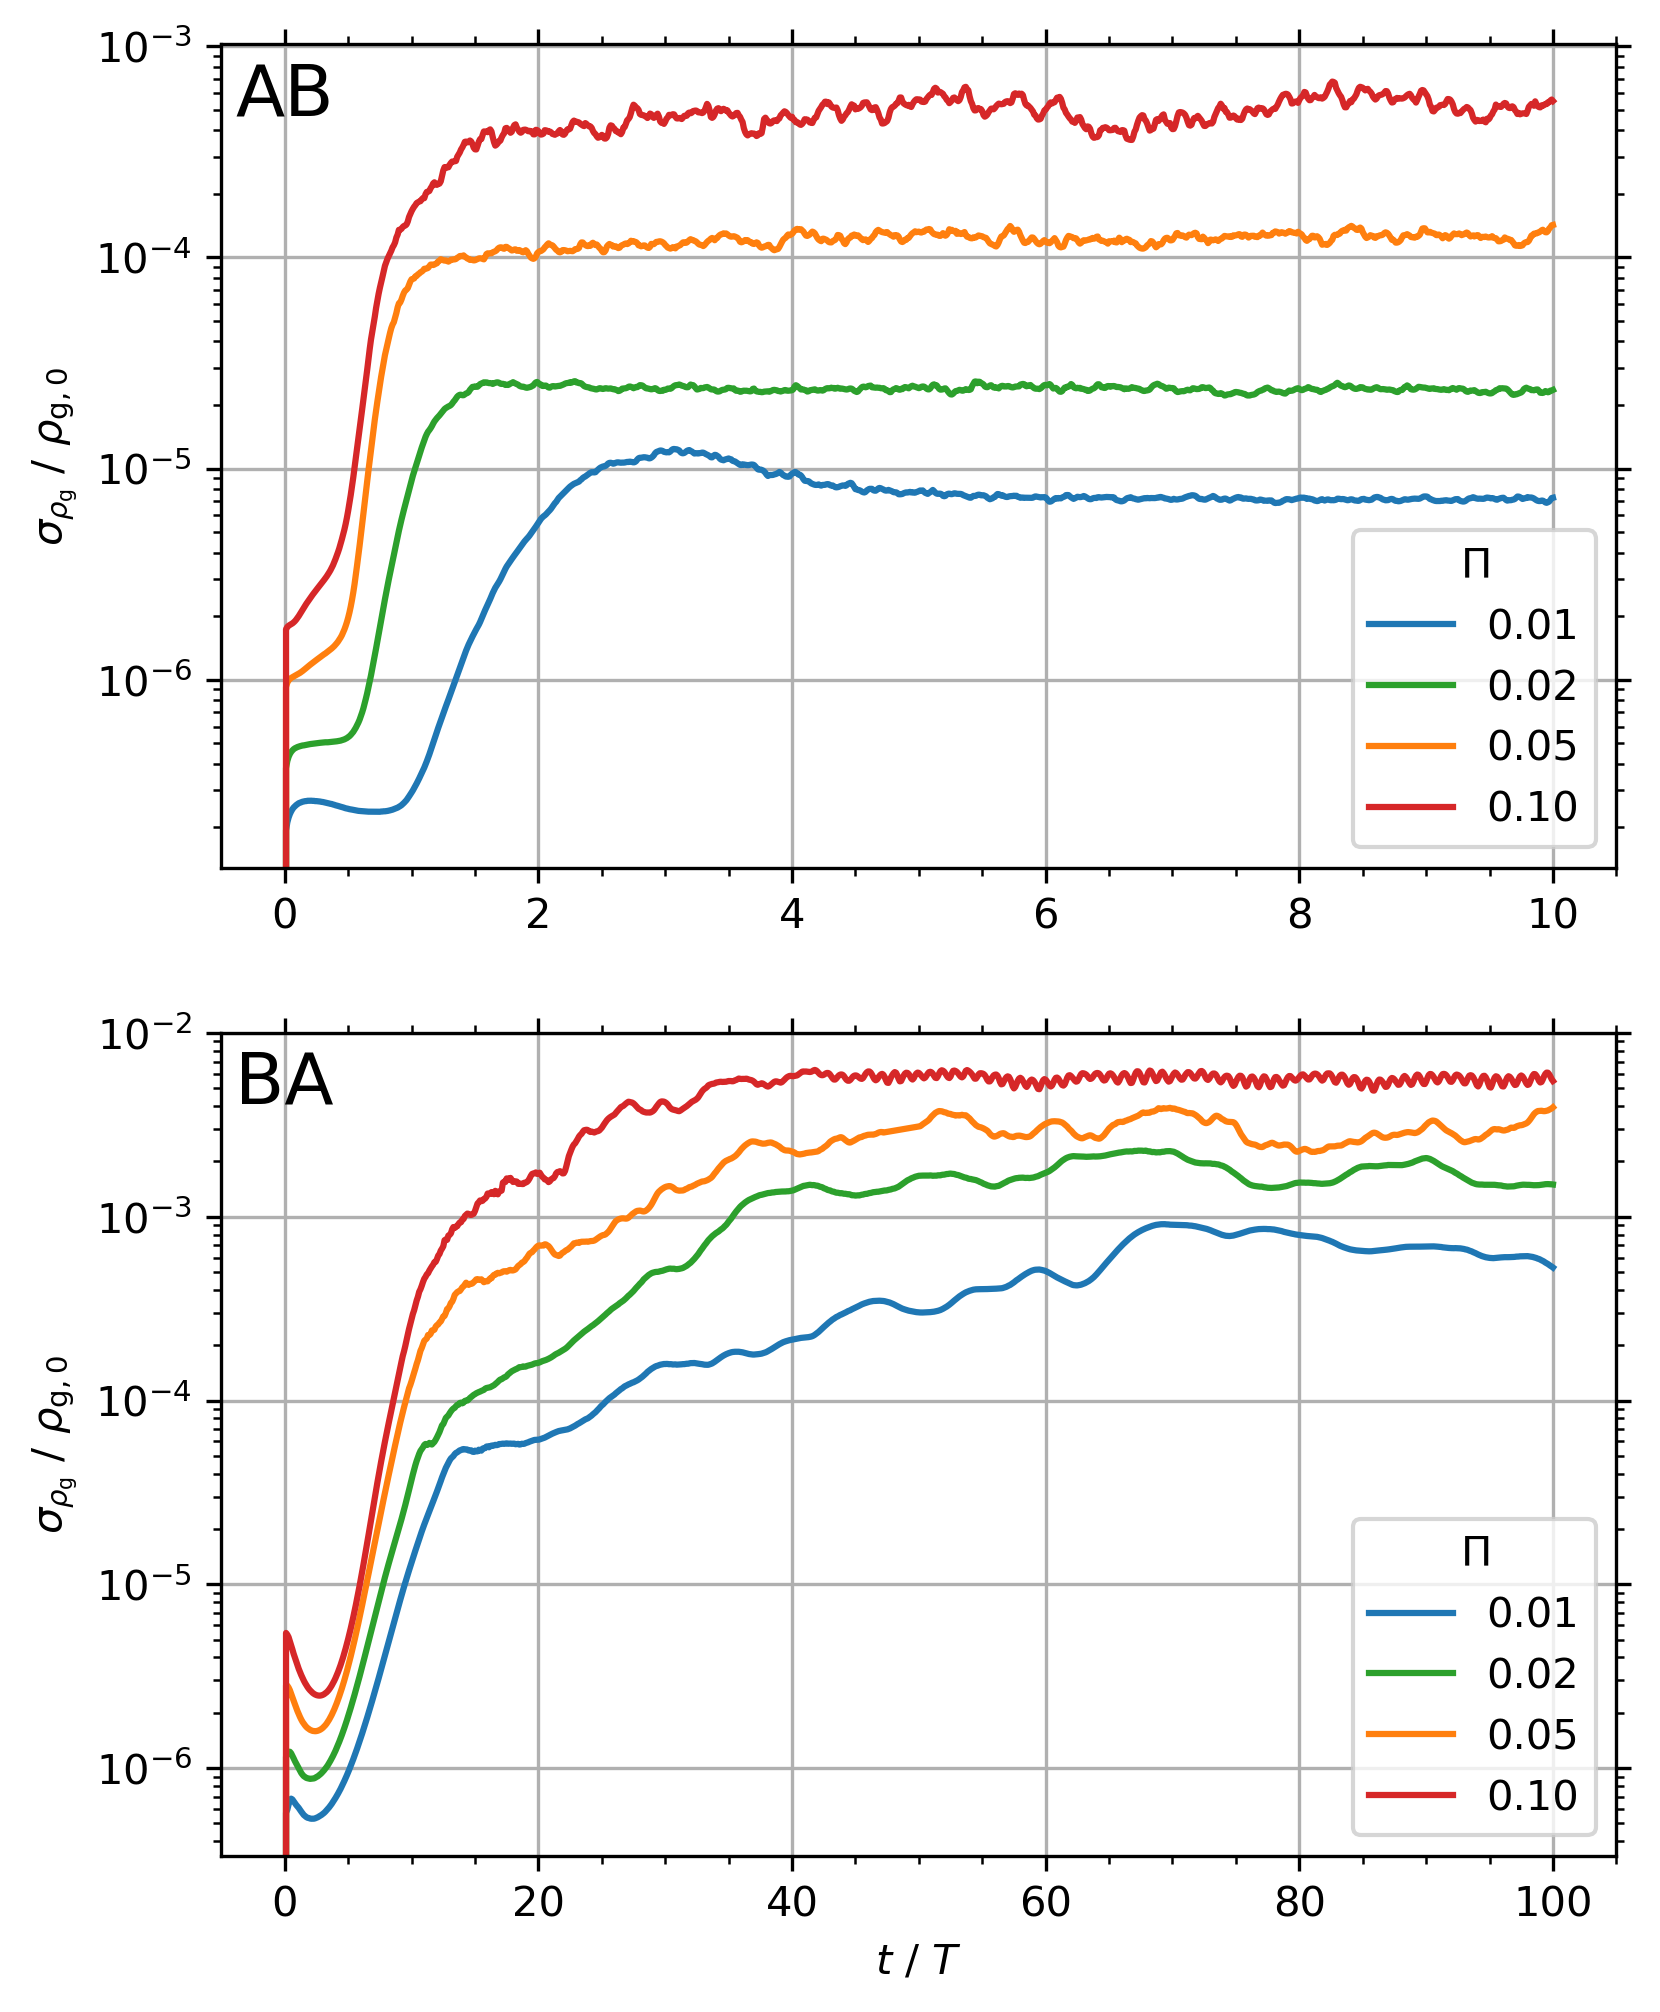

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(6,8), dpi=dpi)
runs = ['AB', 'BA']
Pis = [['0.01', 'tab:blue'], ['0.02', 'tab:green'],
       ['0.05', 'tab:orange'], ['0.10', 'tab:red']]
res = '2048'
xlims = [(-0.5, 10.5), (-5, 105)]                           # remove for final

for i,run in enumerate(runs):
    for Pi in Pis:
        hst = athena_read.hst(pwd+'%s/%s/%s/output/SI.hst'\
                              %(run, Pi[0], res))
        rhog_amps = np.sqrt(hst['drhog2'] - hst['drhog']**2)

        axs[i].semilogy(hst['time'], rhog_amps, color=Pi[1], label=Pi[0])
    
    axs[i].grid()
    axs[i].legend(loc='lower right', title=r'$\Pi$')
    axs[i].minorticks_on()
    axs[i].set(xlim=xlims[i],                               # remove for final
               ylabel=r'$\sigma_{\rho_\mathrm{g}}$ / $\rho_\mathrm{g,0}$')
    axs[i].text(0.01, 0.98, run, ha='left', va='top', size='xx-large',
                transform=axs[i].transAxes)
    axs[i].tick_params(which='both', top=True, right=True)

axs[1].set(xlabel=r'$t$ / $T$')
plt.savefig('figs/gdd.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/gdd.png', bbox_inches='tight', pad_inches=0.01)

## Turbulent Gas Mach Numbers

AB/0.05
  Ma_x = 1.1e-02 ± 3.1e-04
  Ma_y = 4.9e-03 ± 2.8e-04
  Ma_z = 7.3e-03 ± 2.0e-04
BA/0.05
  Ma_x = 1.1e-02 ± 1.1e-03
  Ma_y = 1.6e-02 ± 2.8e-03
  Ma_z = 3.2e-02 ± 6.9e-03


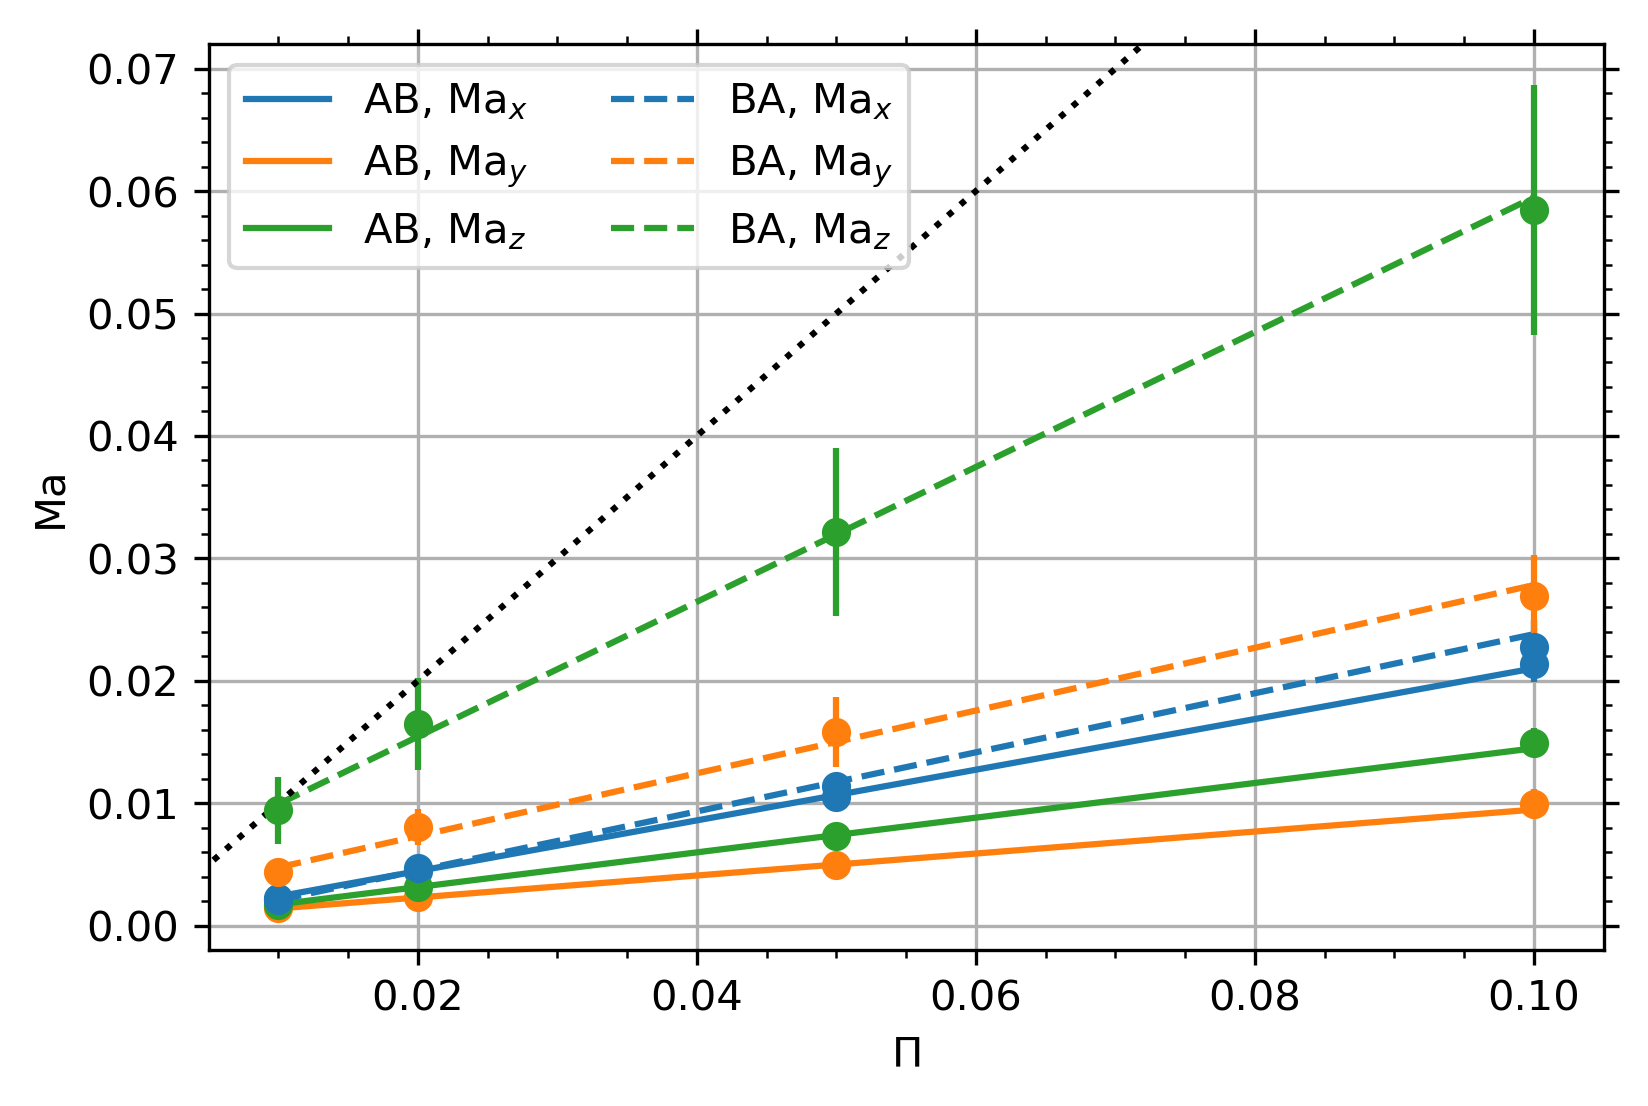

In [4]:
fig, ax = plt.subplots(dpi=dpi)
runs = [['AB', 'solid', 2.0], ['BA', 'dashed', 20.0]]
Pis = [0.01, 0.02, 0.05, 0.10]
res = '2048'
dirs = [['x', 'dux',   'dux2', 1, 'tab:blue'],
        ['y', 'duy',   'duy2', 1, 'tab:orange'],
        ['z', '2-mom', '2-KE', 2, 'tab:green']]
avgMas, stdMas= np.zeros((len(Pis), len(dirs))), np.zeros((len(Pis), len(dirs)))
func = lambda x, b, m : m*x+b # linear model function
case, modfunc, b, berr, m, merr = [], [], [], [], [], []

for run in runs:
    print(f'{run[0]:s}/0.05')
    for i,dir in enumerate(dirs):
        for j,Pi in enumerate(Pis):
            path = pwd+'%s/%s/%s/'%(run[0], f'{Pi:0.2f}', res)
            athinput = athena_read.athinput(path+'athinput.si')
            hst = athena_read.hst(path+'output/SI.hst')
            i_sat = int(run[2]/athinput['output3']['dt']) # index of sat. state
            disp = np.sqrt(dir[3]*hst[dir[2]]/hst['mass']-(hst[dir[1]]/hst['mass'])**2)
            Ma = disp/athinput['hydro']['iso_sound_speed']
            avgMas[j,i], stdMas[j,i] = np.average(Ma[i_sat:]), np.std(Ma[i_sat:])
            if Pi==0.05:
                print(f'  Ma_{dir[0]:s} = {avgMas[j,i]:.1e} ± {stdMas[j,i]:.1e}')

        popt, pcov = curve_fit(func, Pis, avgMas[:,i], sigma=stdMas[:,i])
        perr = np.sqrt(np.diag(pcov))
        label = r'{:s}, Ma$_{:s}$'.format(run[0], dir[0])
        
        ax.errorbar(Pis, avgMas[:,i], stdMas[:,i], fmt='o', color=dir[4])
        ax.plot(Pis, func(np.asarray(Pis), *popt), ls=run[1], color=dir[4], label=label)
        case.append(run[0]); modfunc.append(f'Ma$_{dir[0]:s}=m\Pi+b$')
        b.append(popt[0]); berr.append(perr[0])
        m.append(popt[1]); merr.append(perr[1])

# ax.plot([0.01, 0.07], [0.01, 0.07], ls=':', color='black')
ax.plot([0.0, 0.11], [0.0, 0.11], ls=':', color='black')
ax.grid()
ax.legend(ncol=2)
ax.minorticks_on()
ax.set(xlabel=r'$\Pi$', ylabel='Ma', xlim=(0.005, 0.105), ylim=(-0.002,0.072))
ax.tick_params(which='both', top=True, right=True)
plt.savefig('figs/machs.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/machs.png', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Case'       : case,
    'Function'   : modfunc,
    '$m$'        : m,
    '$\pm\sigma_m$' : merr,
    '$b$'        : b,
    '$\pm\sigma_b$' : berr,})
s = df.style.format({
    '$m$'        : '{:.2f}',
    '$\pm\sigma_m$' : '$\pm${:.3f}',
    '$b$'        : '{:.1e}',
    '$\pm\sigma_b$' : '$\pm${:.1e}',})
s.to_latex(buf='tabs/machs.txt')

## Morphologies

### AB

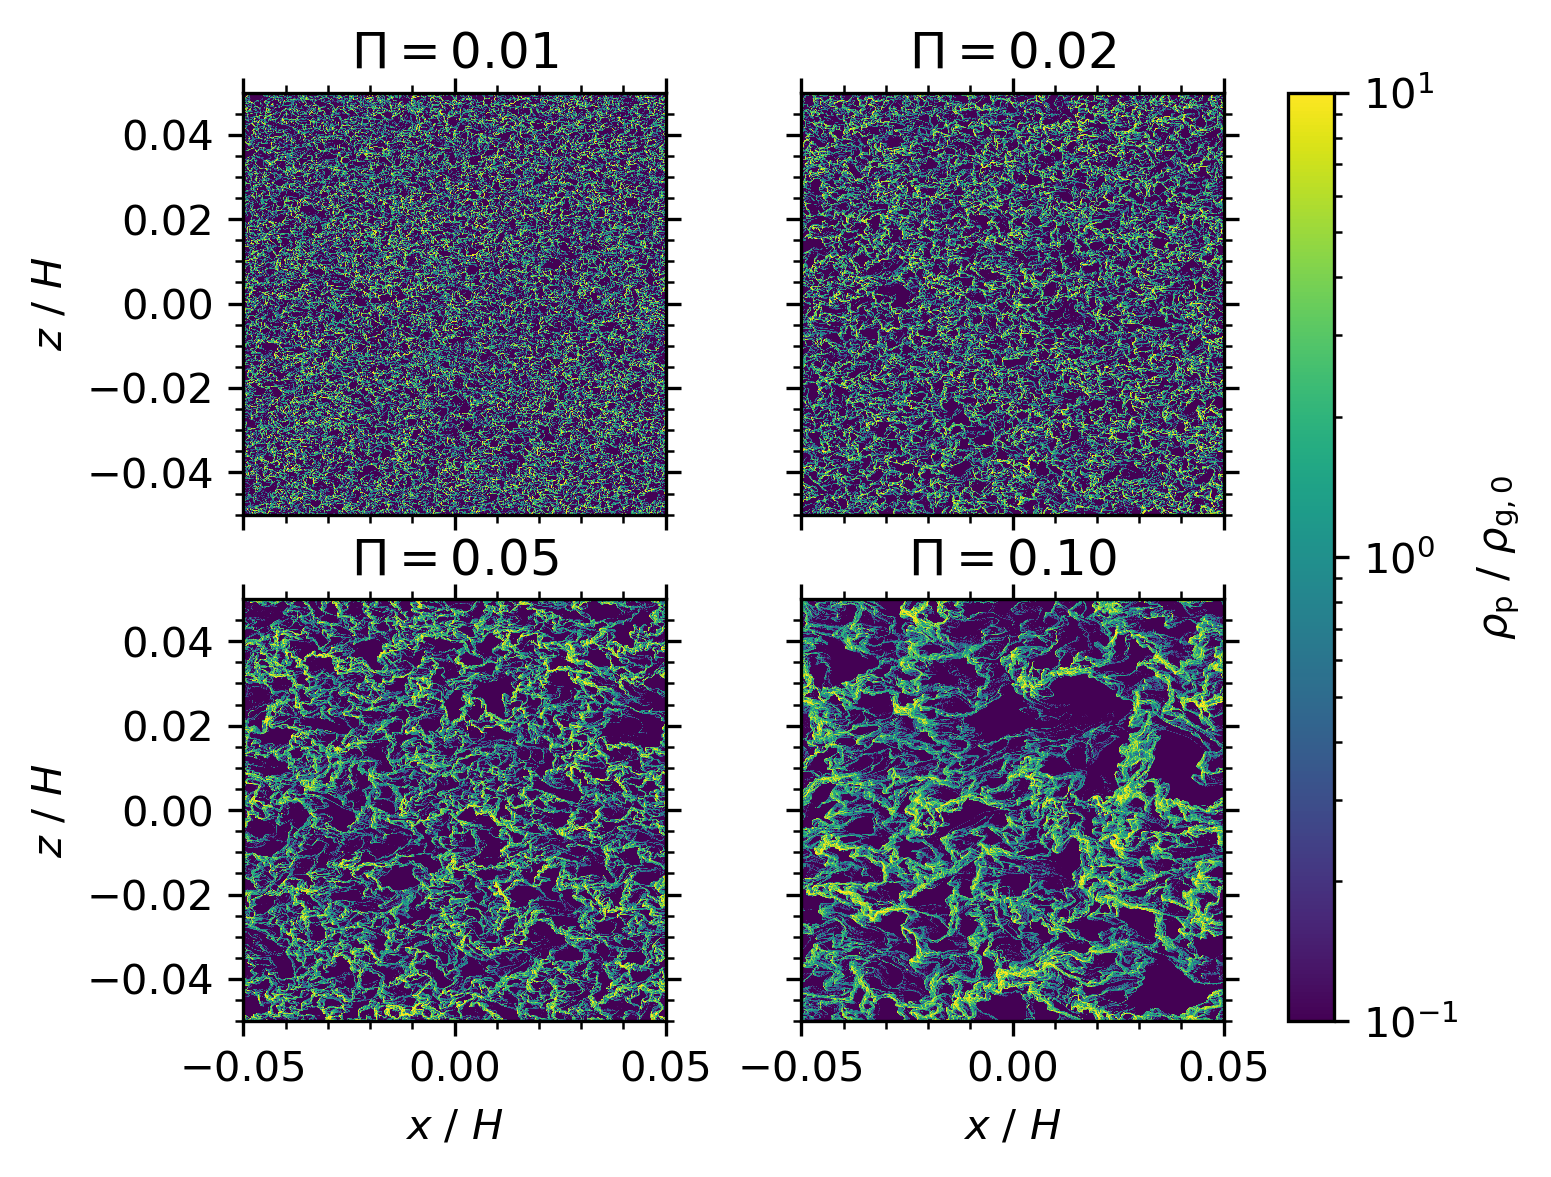

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(5.5, 4.1), dpi=300)
run = 'AB'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'
vmin, vmax = 1e-1, 1e1                           # CPDD > 85%; CPDD < 5%

for i,Pi in enumerate(Pis):
    path = pwd+'%s/%s/%s/'%(run, Pi, res)
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H = c_s/Omega                                # gas scale height
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    # Particle density
    data = np.clip(data['rhop'][0], vmin, vmax)
    rhops = axs.flat[i].pcolormesh(xf, zf, data, norm=colors.LogNorm())
    axs.flat[i].set(title=f'$\Pi={Pi:s}$')

for ax in axs.flat:
    ax.minorticks_on()
    ax.set(aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.label_outer()

cb_rhop = fig.colorbar(rhops, ax=axs.flat)
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
plt.savefig('figs/abs.png', dpi=300, bbox_inches='tight', pad_inches=0.01)

## Autocorrelation

### AB

In [2]:
fig, axs = plt.subplots(4, 2, figsize=(5, 8.5), dpi=dpi)
run = 'AB'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '2048'
vmin, vmax = 1e-1, 1e1                           # CPDD > 85%; CPDD < 5%

for i,Pi in enumerate(Pis):
    path = pwd+'%s/%s/%s/'%(run, Pi, res)
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H = c_s/Omega                                # gas scale height
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    # Particle density
    clip = np.clip(data['rhop'][0], vmin, vmax)
    rhops = axs.flat[i].pcolormesh(xf, zf, clip, norm=colors.LogNorm())
    axs.flat[i].set(title=f'$\Pi={Pi:s}$')
    # Autocorrelation
    ft = fftpack.fft2(data['rhop'][0])           # Fourier transform
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real # autocorrelation
    norm = ac/ac[0][0]                           # normalize
    shift = fftpack.fftshift(norm)               # center spectrum
    acs = axs.flat[i+4].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin))
    axs.flat[i+4].set(title=f'$\Pi={Pi:s}$')

for ax in axs.flat:
    ax.minorticks_on()
    ax.set(aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.label_outer()

cb_rhop = fig.colorbar(rhops, ax=axs.flat[:4])
cb_ac = fig.colorbar(acs, ax=axs.flat[4:])
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
cb_ac.set_label(r'$\mathrm{R}_{\rho\rho}\,/\,\max\,\mathrm{R}_{\rho\rho}$')
# plt.savefig('figs/autocorr_ab.png', dpi=190, bbox_inches='tight', pad_inches=0.01)

### BA

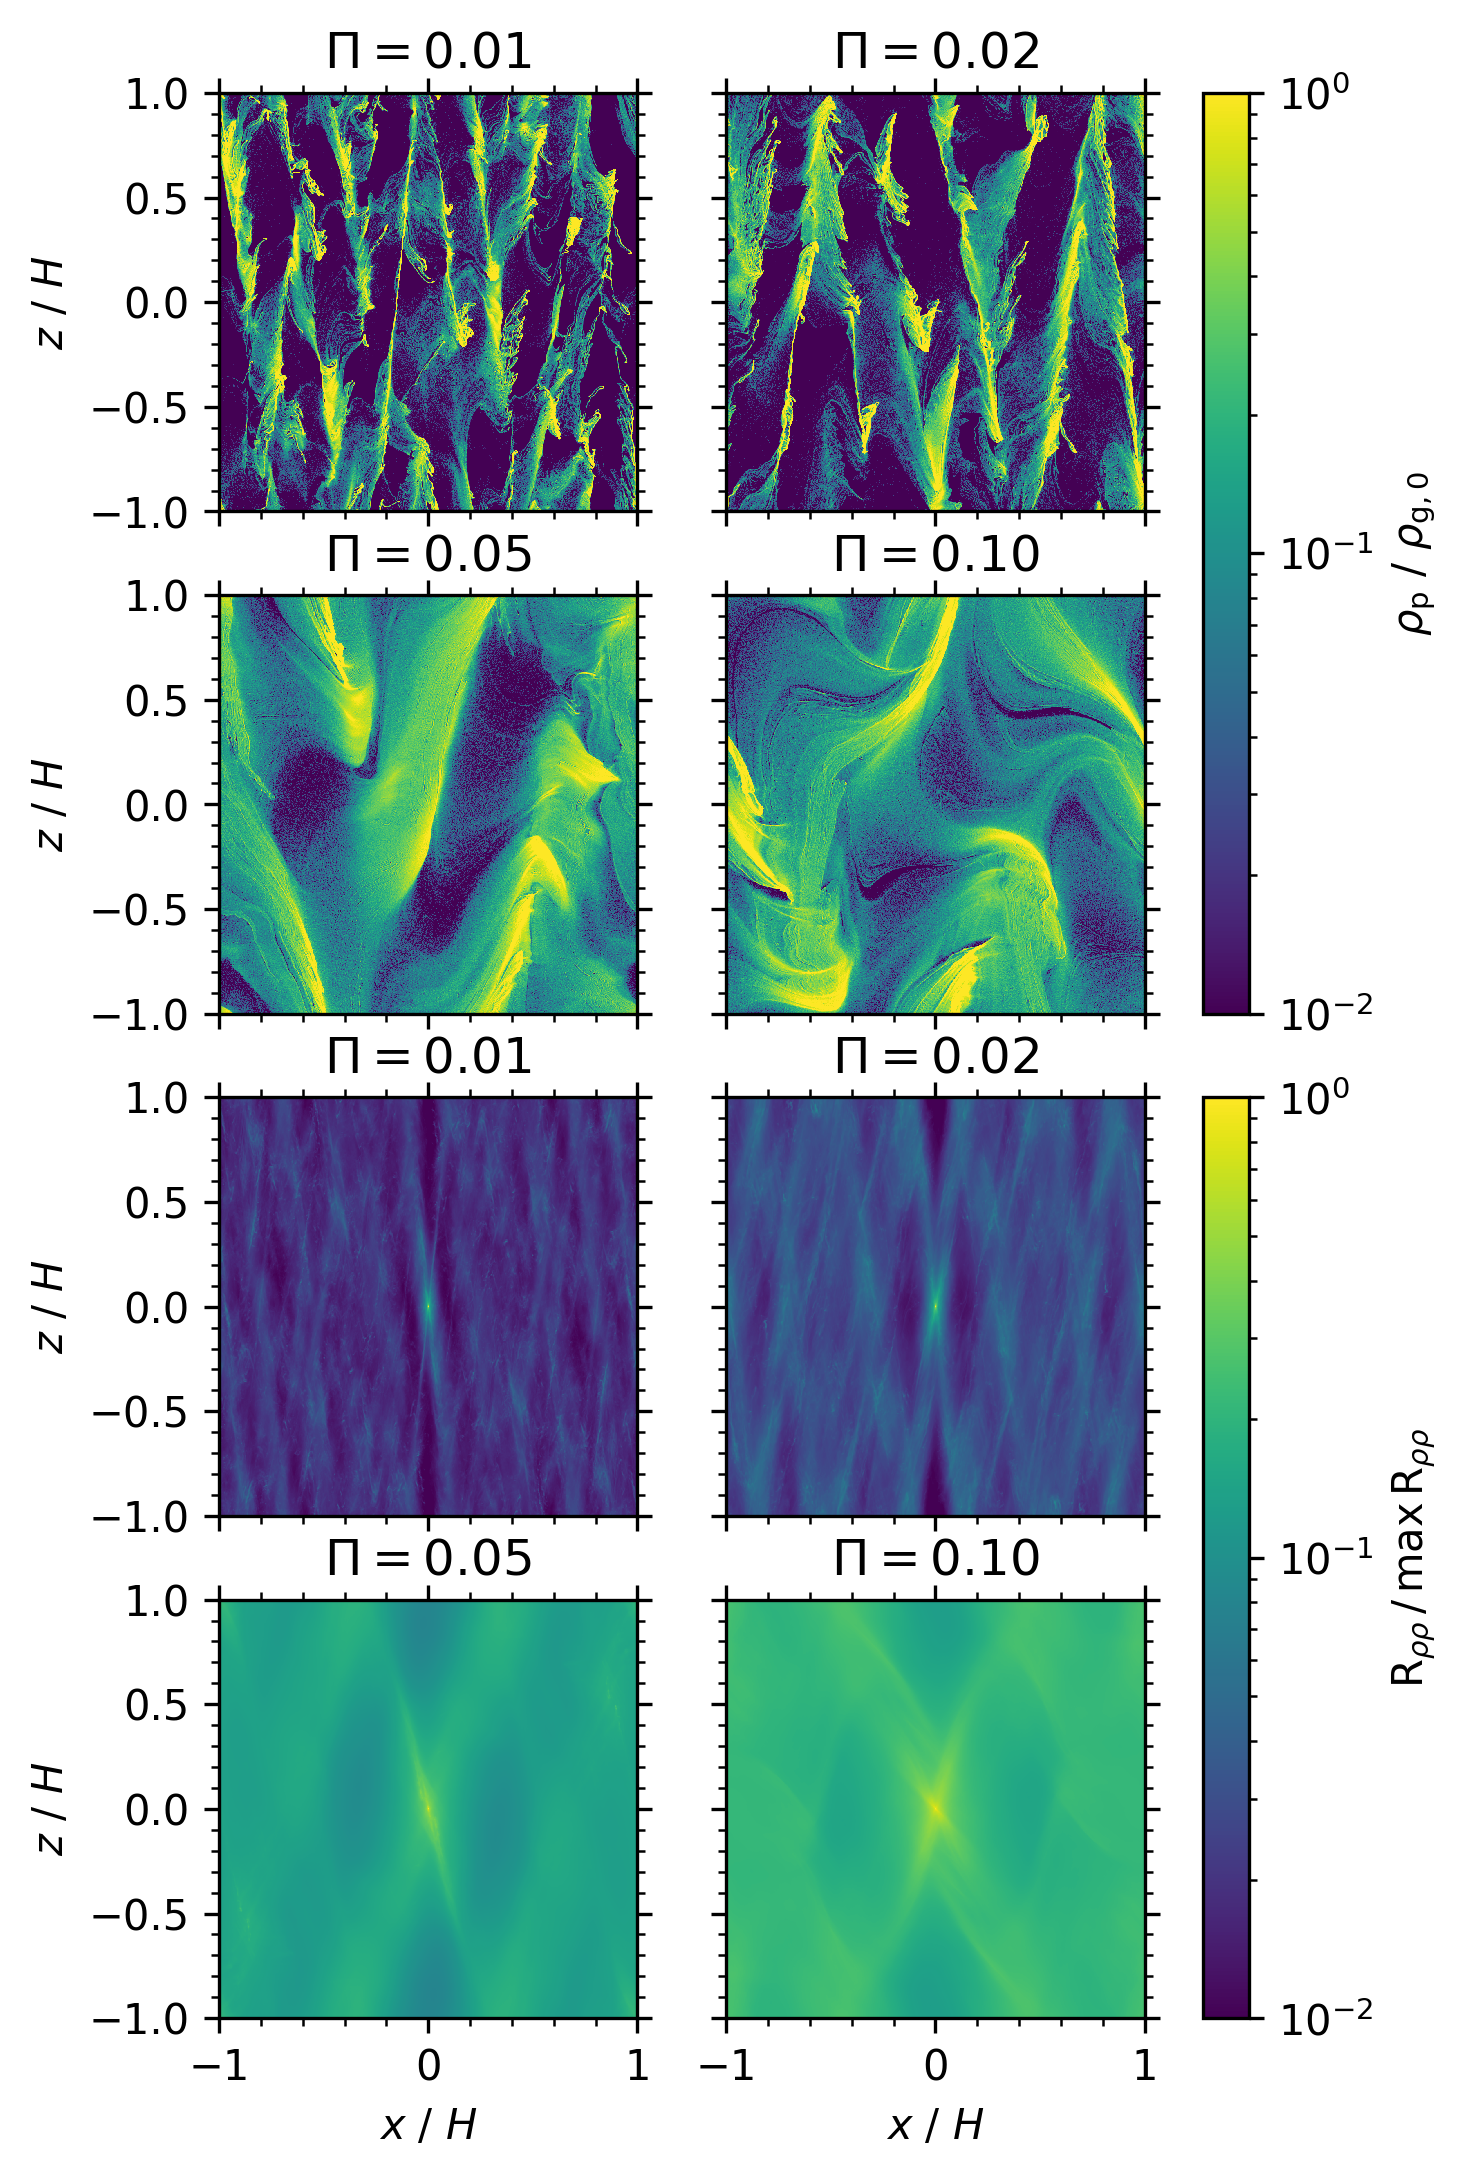

In [4]:
pwd = '../nonlinear/Pi/'                         # ***REMOVE IN FINAL***

fig, axs = plt.subplots(4, 2, figsize=(5, 8.5), dpi=dpi)
run = 'BA'
Pis = ['0.01', '0.02', '0.05', '0.10']
res = '1024' #'2048'                             # ***FIX IN FINAL***
vmin, vmax = 1e-2, 1e0                           # CPDD > 85%; CPDD < 5%

for i,Pi in enumerate(Pis):
    path = pwd+'%s/%s/old/%s/'%(run, Pi, res)    # ***FIX IN FINAL***
    athinput = athena_read.athinput(path+'athinput.si')
    c_s = athinput['hydro']['iso_sound_speed']
    Omega = athinput['problem']['omega']
    H = c_s/Omega                                # gas scale height
    T = 2*np.pi/Omega                            # orbital period
    data = athena_read.athdf(path+'athdf/'+athinput["job"]["problem_id"]\
                             +'.out2.02000.athdf')
    xf, zf = data['x1f']/H, data['x2f']/H
    # Particle density
    clip = np.clip(data['rhop'][0], vmin, vmax)
    rhops = axs.flat[i].pcolormesh(xf, zf, clip, norm=colors.LogNorm())
    axs.flat[i].set(title=f'$\Pi={Pi:s}$')
    # Autocorrelation
    ft = fftpack.fft2(data['rhop'][0])           # Fourier transform
    ac = fftpack.ifft2(ft*np.conjugate(ft)).real # autocorrelation
    norm = ac/ac[0][0]                           # normalize
    shift = fftpack.fftshift(norm)               # center spectrum
    acs = axs.flat[i+4].pcolormesh(xf, zf, shift, norm=colors.LogNorm(vmin))
    axs.flat[i+4].set(title=f'$\Pi={Pi:s}$')

for ax in axs.flat:
    ax.minorticks_on()
    ax.set(aspect='equal', xlabel=r'$x$ / $H$', ylabel=r'$z$ / $H$')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.label_outer()

cb_rhop = fig.colorbar(rhops, ax=axs.flat[:4])
cb_ac = fig.colorbar(acs, ax=axs.flat[4:])
cb_rhop.set_label(r'$\rho_\mathrm{p}$ / $\rho_\mathrm{g,0}$')
cb_ac.set_label(r'$\mathrm{R}_{\rho\rho}\,/\,\max\,\mathrm{R}_{\rho\rho}$')
plt.savefig('figs/autocorr.png', dpi=190, bbox_inches='tight', pad_inches=0.01)

# Extra